### Examen T5 - Visualización con Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

**Pregunta 1:** Utilizando el conjunto de datos "Flights" graficar:

* Mediante un diagrama de barras, la media de pasajeros por año entre 1954 y 1960. 
* ¿ Cúal fue el año que en promedio hubo mayor afluencia de pasajeros ?

In [2]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [14]:
flights_filtrado = flights[(flights['year']>=1954) & (flights['year']<=1960)]
media_pasajeros = round(flights_filtrado.groupby('year')['passengers'].mean(),2)
media_pasajeros

year
1954    238.92
1955    284.00
1956    328.25
1957    368.42
1958    381.00
1959    428.33
1960    476.17
Name: passengers, dtype: float64

<Axes: xlabel='year', ylabel='passengers'>

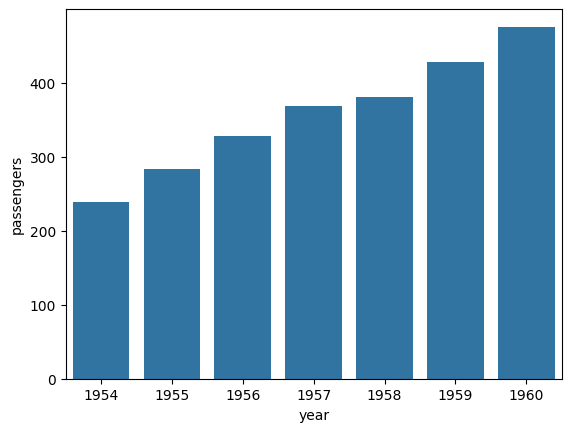

In [15]:
sns.barplot(data=media_pasajeros)

#### El año que, en promedio, hubo mayor afluencia de pasajeros fue en 1960

**Pregunta 2:** Utilizando el conjunto de datos "Flights" graficar:

* Mediante un diagrama de barras la suma de pasajeros por año entre 1954 y 1960. 
* ¿ Cúal fue el año en que hubo mayor afluencia de pasajeros ?

<Axes: xlabel='year', ylabel='passengers'>

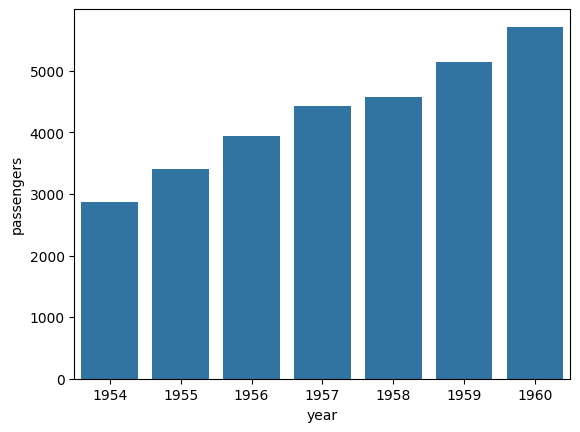

In [18]:
flights_filtrado = flights[(flights['year']>=1954) & (flights['year']<=1960)]
suma_pasajeros = flights_filtrado.groupby('year')['passengers'].sum()
sns.barplot(data=suma_pasajeros)

#### El año que hubo mayor afluencia de pasajeros fue en 1960

**Pregunta 3:** Utilizando el conjunto de datos "planets":

* Mediante un countplot mostrar cuantos registros se realizaron por cada método.
* Remarcar con un color diferente aquel que tenga mayor cantidad de registros.

In [2]:
df_planets = sns.load_dataset('planets')
df_planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


<Axes: xlabel='method', ylabel='count'>

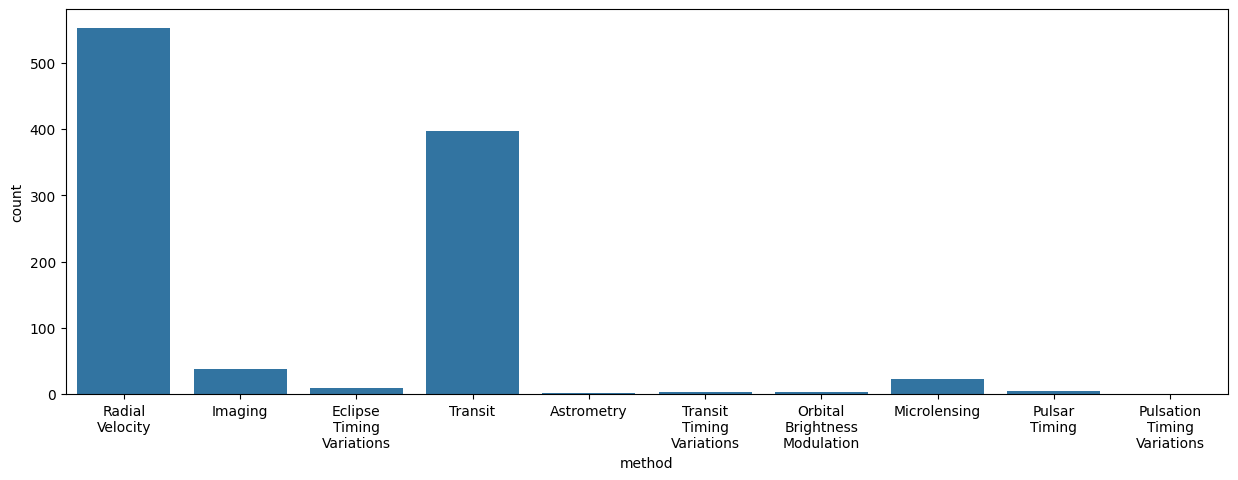

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)

df_planets['method'] = df_planets['method'].apply(lambda x:x.replace(" ","\n"))
sns.countplot(data=df_planets, x='method')

<function matplotlib.pyplot.show(close=None, block=None)>

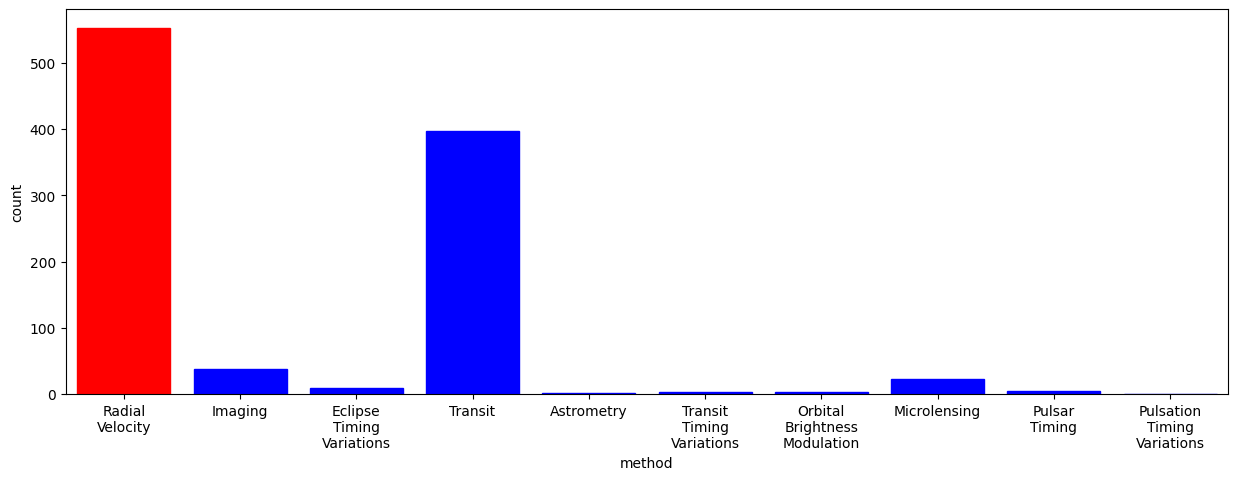

In [20]:
# Remarcar con un color diferente aquel que tenga mayor cantidad de registros.

df_planets['method'] = df_planets['method'].apply(lambda x:x.replace(" ","\n"))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plot = sns.countplot(data=df_planets, x='method', ax=ax)

max_category = 'Radial Velocity'

for bar in plot.patches:
    if bar.get_height() == df_planets['method'].value_counts().max():
        bar.set_color('red')
    else:
        bar.set_color('blue')
        
plt.show


**Pregunta 4:** Utilizando el conjunto de datos "planets":

* Se desea saber en cuantos registros donde se utilizó el método "Radial Velocity" el valor de "mass" es valido e invalido(NaN).

In [57]:
radial_velocity_df = df_planets[df_planets['method']=='Radial Velocity']

mass_valido = radial_velocity_df['mass'].notna().sum()
print(f'El número de registros donde se utilizó el método "Radial Velocity" y el valor de mass es válido es:', mass_valido)

El número de registros donde se utilizó el método "Radial Velocity" y el valor de mass es válido es: 510


In [59]:
mass_invalido = radial_velocity_df['mass'].isna().sum()
print(f'El número de registros donde se utilizó el método "Radial Velocity" y el valor de mass es inválido es:', mass_invalido)

El número de registros donde se utilizó el método "Radial Velocity" y el valor de mass es inválido es: 43


**Pregunta 5:** Utilizando el conjunto de datos "planets":

* Se desea visualizar mediante un swarmplot el periodo orbital por cada uno de los planetas.

In [60]:
df_planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [4]:
df_planets['number'].unique()

array([1, 2, 3, 5, 4, 6, 7], dtype=int64)

C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\guill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\guill\AppData\Local\Packages\Py

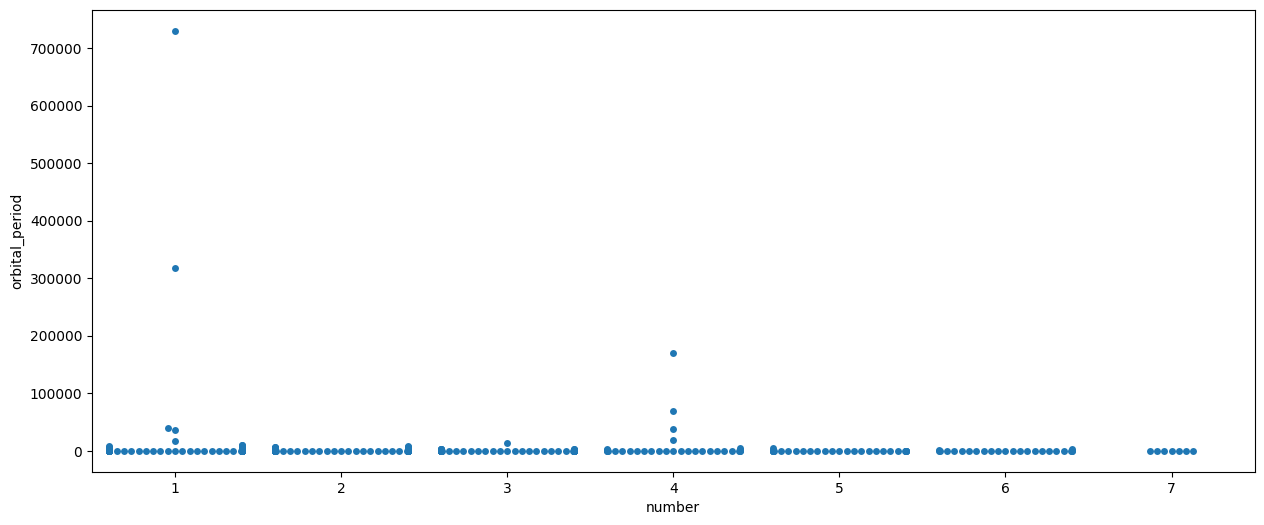

In [18]:
plt.figure(figsize=(15, 6))
sns.swarmplot(data=df_planets, x='number', y='orbital_period')
plt.show()

**Pregunta 6:** Utilizando el conjunto de datos "planets":

* Se desea visualizar mediante un stripplot el periodo orbital por cada uno de los métodos y agruparlo por planeta.

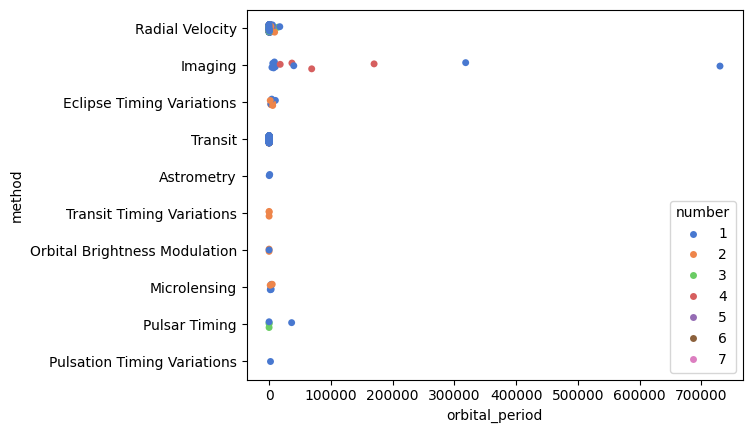

In [14]:
sns.stripplot(data=df_planets, x='orbital_period', y='method', palette=sns.color_palette('muted', 7), hue='number')
plt.show()

**Pregunta 7:** Utilizando el conjunto de datos "mpg":

* Mediante un barplot se desea saber que vehiculos consumen más combustible en promedio según su procedencia.


In [2]:
df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<Axes: xlabel='origin', ylabel='mpg'>

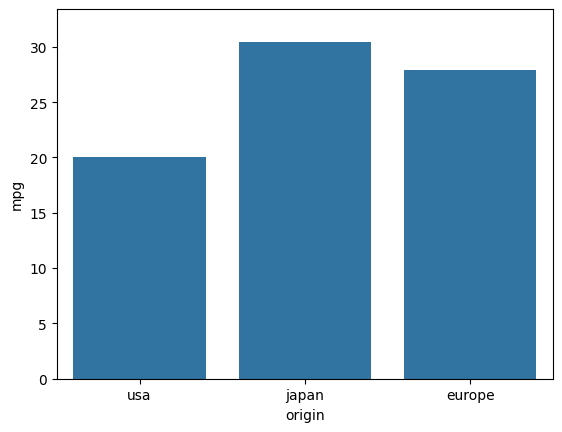

In [76]:
sns.barplot(data=df_mpg, x='origin', y='mpg', err_kws= {'linewidth':0})

**Pregunta 8:** Utilizando el conjunto de datos "mpg":

* ¿Qué tipo de correlación tiene la aceleración respecto al peso?

<Axes: xlabel='acceleration', ylabel='weight'>

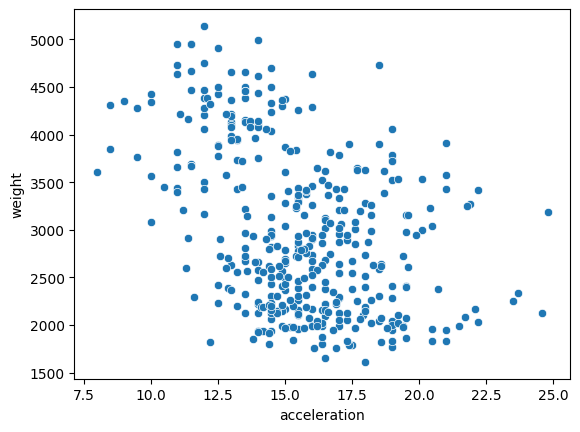

In [5]:
sns.scatterplot(data=df_mpg, x='acceleration', y='weight')

### Se puede interpretar que se establece una relación de tendencia negativa, es decir, cuanto mayor es el peso menor es la acelaration y viceversa. 

**Pregunta 9:** Utilizando el conjunto de datos "mpg":

* ¿La cantidad de cilindros influye en los caballos de potencia?
* Visualizarlo mediante un stripplot

<Axes: xlabel='cylinders', ylabel='horsepower'>

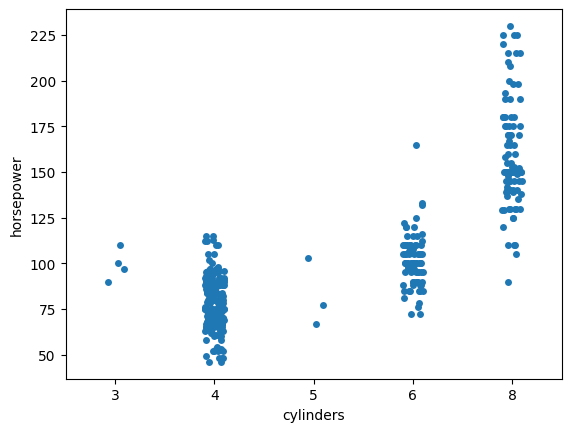

In [6]:
sns.stripplot(data=df_mpg, x='cylinders', y='horsepower')

#### Aquí se comprueba perfectamente que a medida que la cilindrada es mayor, el motor desarrolla mayor potencia. Sobre todo en motores de mayor cilindrada como aquellos de 6 y de 8 cilindros.

**Pregunta 10:** Utilizando el conjunto de datos "mpg":

* Graficar la distribución del consumo de gasolina "mpg"  por año de los vehiculos de procedencia japonesa mediante un boxplot.
* Configurar las marcas del eje "y" con los cuartiles para que coincidan con el boxplot.

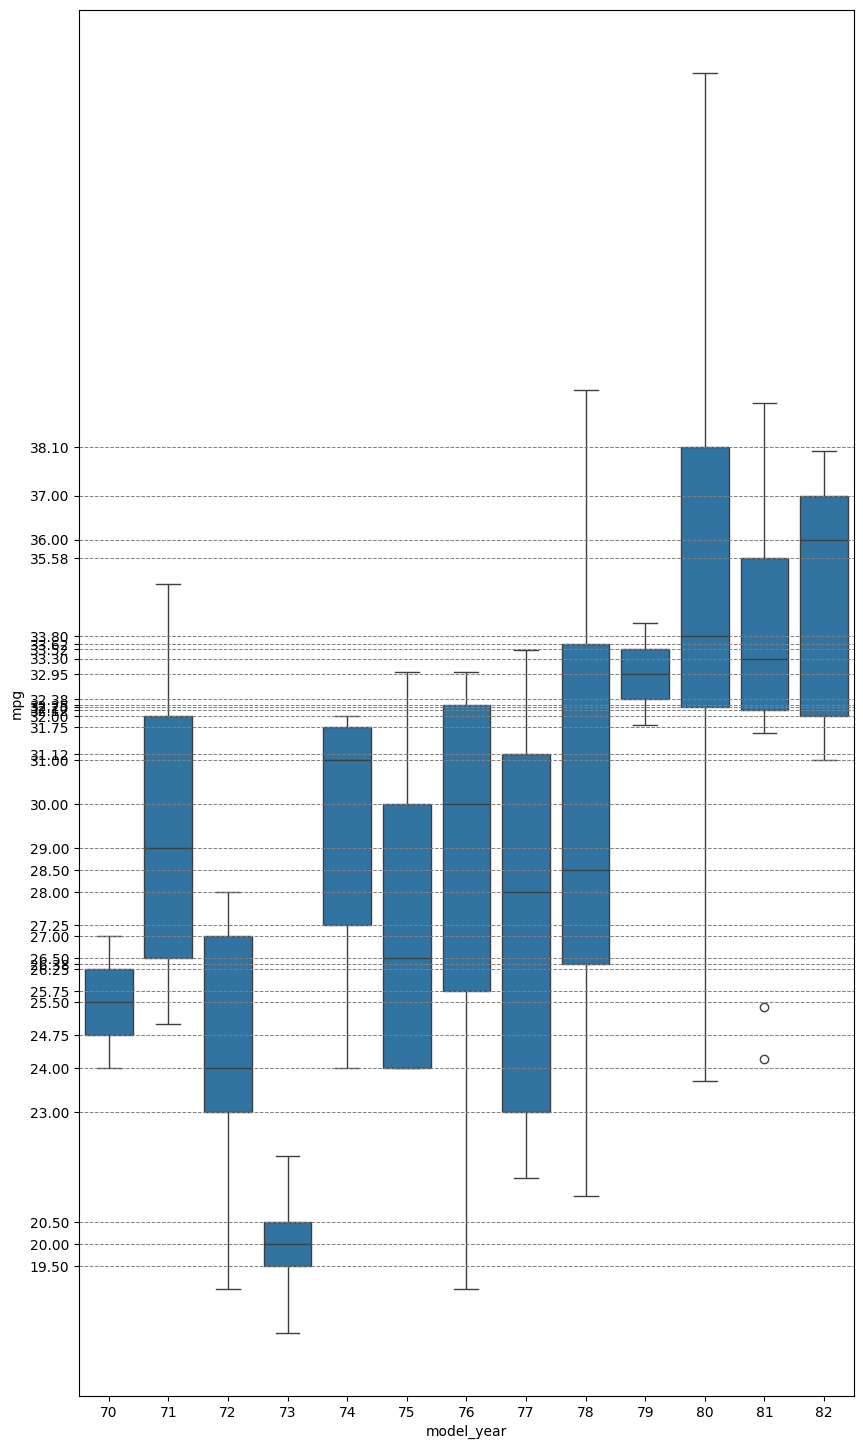

In [16]:
procedencia = df_mpg[df_mpg['origin']=='japan']
#procedencia
cuartiles = procedencia.groupby('model_year')['mpg'].quantile([0.25, 0.5, 0.75]).unstack()
plt.figure(figsize=(10, 18))
sns.boxplot(data=procedencia, x='model_year', y='mpg')
y_ticks = np.unique(cuartiles.values.flatten())
plt.yticks(y_ticks)
for q in y_ticks:
    plt.axhline(y=q, color='gray', linestyle='--', linewidth=0.7)
plt.show()

**Pregunta 11:** Utilizando el conjunto de datos "mpg":

* Realizar un diagrama de pares.
* Analizar las correlaciones.

In [17]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


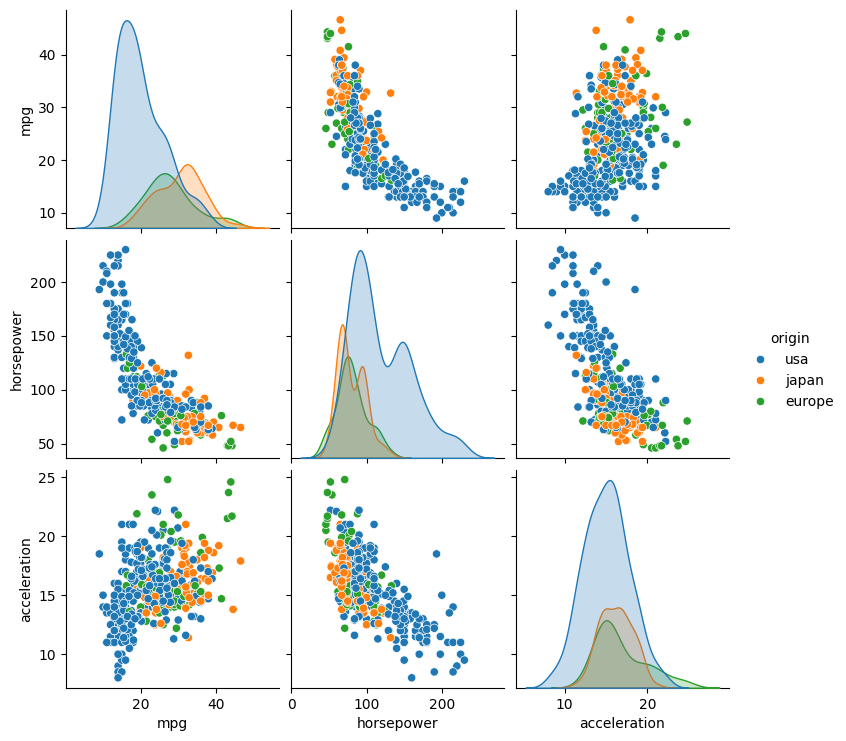

In [24]:
sns.pairplot(data=df_mpg, vars=['mpg', 'horsepower', 'acceleration'], hue='origin')

#### Hay ciertos coches europeos con mayor aceleración que presentan un menor consumo ya que hacen más millas por galón y al mimso tiempo potencias menores. En el caso de los coches japoneses, presentarían una aceleración media, con potencias menores pero con un consumo menor, ya que, hacen más millas por galón; y los coches americanos presentan una mayor diversidad pero son en términos generales son los que presentan unos motores más potentes con una mayor aceleración pero un mayor consumo. 

**Pregunta 12:** Utilizando el conjunto de datos "mpg":

* Calcular las correlaciones.
* Gráficar las correlaciones en un heatmap.

In [26]:
df_numerico = df_mpg.select_dtypes(include=[float, int])
correlaciones = df_numerico.corr()
correlaciones

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

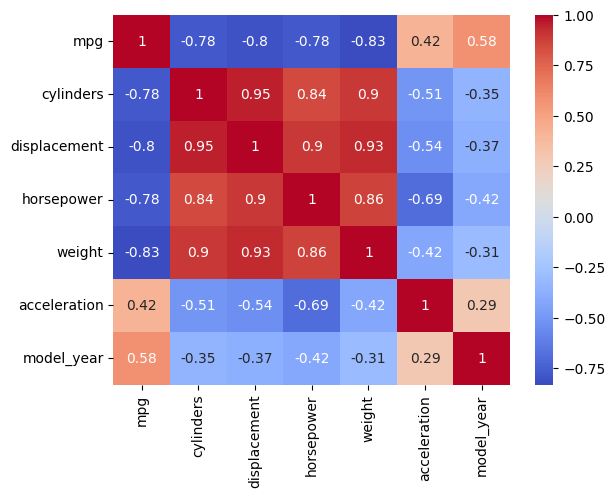

In [30]:
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')

**Pregunta 13:** Utilizando el conjunto de datos "penguins":

* Crear 4 ejes.
* Gráficar el conteo por especies.
* Diagrama de dispersión de **bill_length_mm** con respecto a **bill_depth_mm**
* Diagrama de barras por sexo con el promedio **body_mass_g** 
* KDE de la especie **Chinstrap** respecto **body_mass_g**

In [19]:
df_penguins = sns.load_dataset('penguins')
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='body_mass_g', ylabel='Density'>

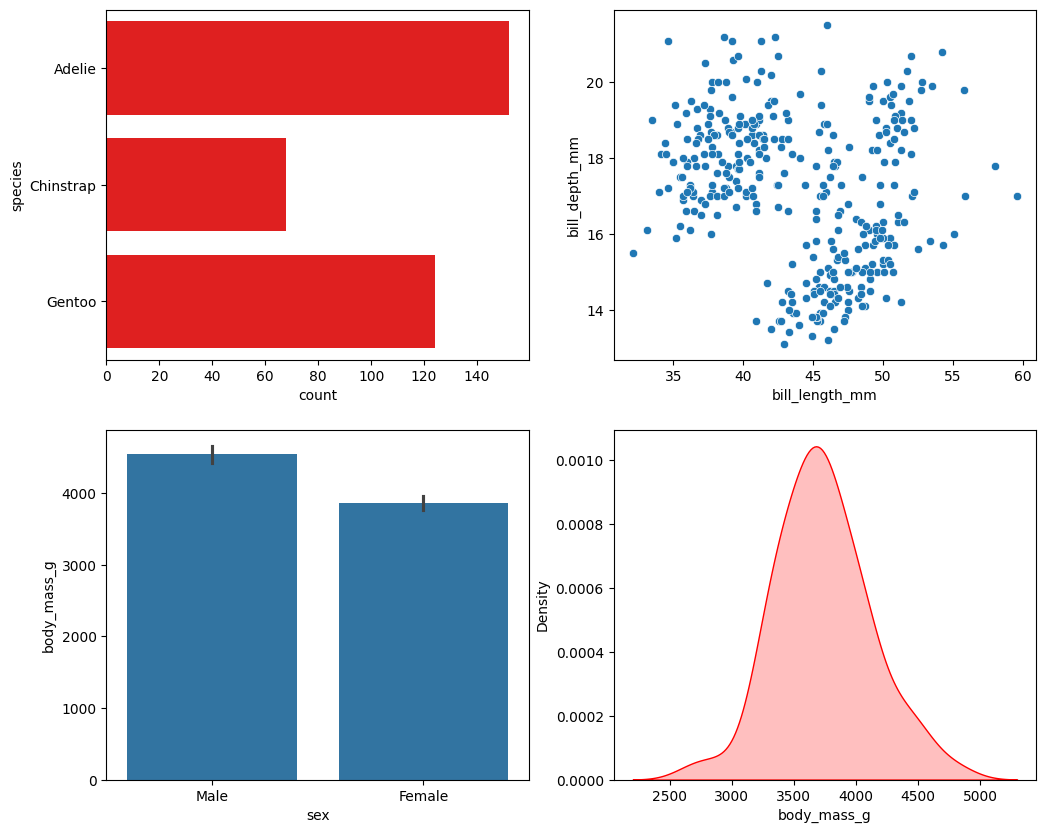

In [28]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.countplot(data=df_penguins['species'], color='red', ax=ax1)
sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm', ax=ax2)
sns.barplot(data=df_penguins, x='sex', y='body_mass_g', ax=ax3)

x = df_penguins[df_penguins['species']=='Chinstrap']['body_mass_g']

sns.kdeplot(x=x, color='red', fill=True, ax=ax4)



**Pregunta 14:** Utilizando el conjunto de datos "penguins" replicar el siguiente gráfico.

<center><img width="400"  src="output.png" /> <center/>

<Axes: xlabel='species', ylabel='count'>

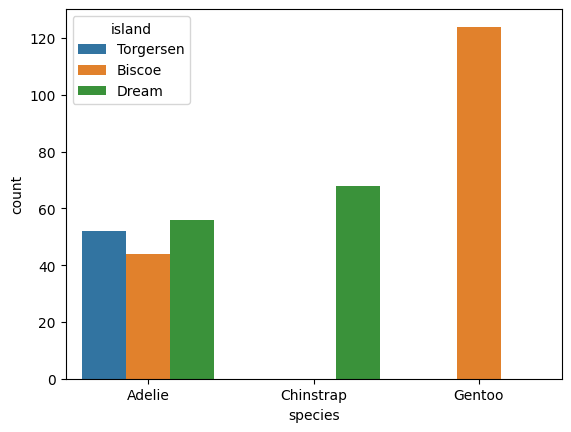

In [20]:
sns.countplot(data=df_penguins, x='species', hue='island')